In [187]:
import pandas as pd

In [188]:
train = pd.read_csv('star.csv')
train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [189]:
train.shape

(240, 7)

In [190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


<AxesSubplot:>

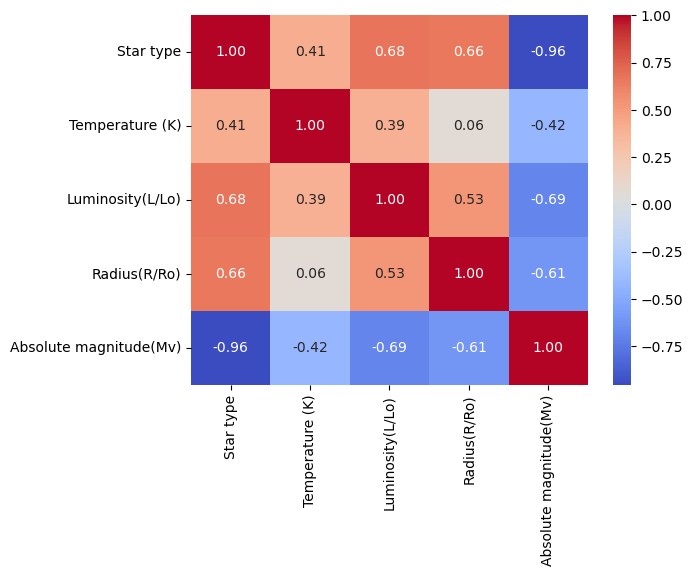

In [191]:
import seaborn as sns

sns.heatmap(train[['Star type', 'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [192]:
train['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [193]:
def frequency_encoding(data, features):
    freq = data.groupby(features).size() / len(data)
    return freq

In [194]:
train['Star color'] = train['Star color'].map(frequency_encoding(train, train['Star color']))

In [195]:
train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0.466667,M
1,3042,0.000500,0.1542,16.60,0,0.466667,M
2,2600,0.000300,0.1020,18.70,0,0.466667,M
3,2800,0.000200,0.1600,16.65,0,0.466667,M
4,1939,0.000138,0.1030,20.06,0,0.466667,M


In [196]:
train['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [197]:
train = pd.get_dummies(train, columns=['Spectral Class'])

In [198]:
train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,0.002400,0.1700,16.12,0,0.466667,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0.466667,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0.466667,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0.466667,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0.466667,0,0,0,0,0,1,0


In [199]:
train.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class_A          0
Spectral Class_B          0
Spectral Class_F          0
Spectral Class_G          0
Spectral Class_K          0
Spectral Class_M          0
Spectral Class_O          0
dtype: int64

In [200]:
train['Temperature (K)'] = (train['Temperature (K)'] - train['Temperature (K)'].min()) / (train['Temperature (K)'].max() - train['Temperature (K)'].min())
train['Absolute magnitude(Mv)'] = (train['Absolute magnitude(Mv)'] - train['Absolute magnitude(Mv)'].min()) / (train['Absolute magnitude(Mv)'].max() - train['Absolute magnitude(Mv)'].min())
train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class_A,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,0.029663,0.002400,0.1700,0.876798,0,0.466667,0,0,0,0,0,1,0
1,0.028980,0.000500,0.1542,0.891807,0,0.466667,0,0,0,0,0,1,0
2,0.017367,0.000300,0.1020,0.957473,0,0.466667,0,0,0,0,0,1,0
3,0.022622,0.000200,0.1600,0.893371,0,0.466667,0,0,0,0,0,1,0
4,0.000000,0.000138,0.1030,1.000000,0,0.466667,0,0,0,0,0,1,0


In [201]:
from sklearn.model_selection import train_test_split

y = train['Star type']
X = train.drop(columns=['Star type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [202]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
model = nb.fit(X_train, y_train)
prediction = model.predict(X_test)

In [203]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy score = {round(accuracy_score(y_test, prediction), 2)*100}%")
print(f"Recall score = {round(recall_score(y_test, prediction, average='weighted'), 2)*100}%")
print(f"Precision score = {round(precision_score(y_test, prediction, average='weighted'), 2)*100}%")
print(f"F1 score = {round(f1_score(y_test, prediction, average='weighted'), 2)*100}%")

Accuracy score = 88.0%
Recall score = 88.0%
Precision score = 90.0%
F1 score = 83.0%


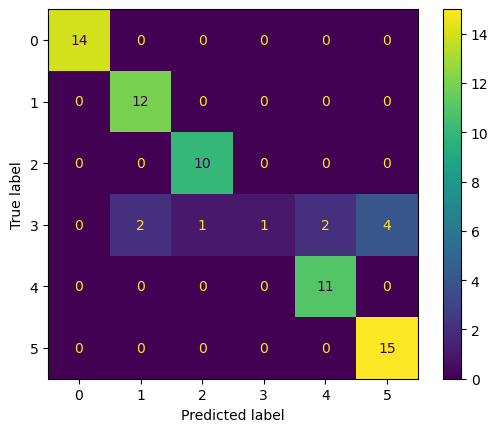

In [204]:
confusion_matrix = confusion_matrix(y_test, prediction)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0,1,2,3,4,5])
display.plot()